<a href="https://colab.research.google.com/github/CathieLC/Wild_notebook_2021-2022/blob/main/2021_Data_Checkpoint_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Les durées sont indicatives et dépendent évidemment de chacun. Si tu vois que tu n'arrives pas à finir une partie dans les temps, n'hésite pas à passer à la partie suivante.

Si tu n'as pas le temps de tout finir, tu pourras reprendre ce checkpoint ce week-end ou la semaine prochaine. Tu indiqueras simplement en commentaire les scripts que tu as complété a posteriori.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import nltk
from nltk.corpus import stopwords
nltk.download('popular')
nltk.download('stopwords') #stopwords
nltk.download("punkt") #ponctuation
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\cathe\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\cathe\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\cathe\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\cathe\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\cathe\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]   

# Partie 1 : Data exploration et processing - Python et Pandas - environ 30 min

Exécute le code ci-dessous. Tu obtiendras un DataFrame avec 10 000 commentaires de restaurants. 
- date : la date du commentaire
- stars : la note attribuée (de 1 à 5)
- text : le texte du commentaire
- type : review
- useful : le nombre d'utilisateur ayant indiqué ce commentaire comme "utile"
- suivent ensuite 27 colonnes indiquant le nombre d'occurences de certains mots dans le commentaire.

Le but de ce checkpoint sera d'explorer ce dataset, puis de proposer un modèle de prédiction de note positive en fonction des autres variables.

Commence par vérifier qu'il n'y a pas de valeur manquante.

In [2]:

df_restaurants = pd.read_csv("https://github.com/murpi/wilddata/raw/master/quests/restaurant.zip", index_col='Unnamed: 0')
df_restaurants.head()

,date,stars,text,type,useful,came,made,happy,definitely,another,...,'ll,friendly,day,delicious,fresh,something,said,ok,'d,lunch
0,2011-01-26,5,My wife took me here on my birthday for breakf...,review,5,1,2,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,2011-07-27,5,I have no idea why some people give bad review...,review,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,review,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,review,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# count Nan Values an entire Df
df_restaurants.isna().sum().sum()

0

## Colonne "useful"

Trace un histogramme et un boxplot afin de représenter la distribution de cette variable.

Les données sont-elles bien réparties ?

No handles with labels found to put in legend.


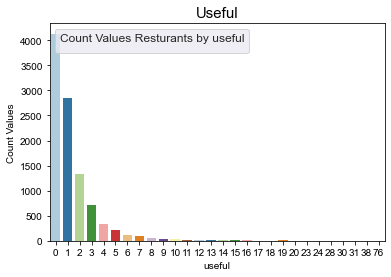

In [4]:
# Histogramme

sns.countplot(x='useful', data =df_restaurants, palette='Paired')
sns.set(rc = {'figure.figsize':(12,8)})
plt.ylabel('Count Values')
plt.title('Useful', size = 15)
plt.legend(title= 'Count Values Resturants by useful',loc = "upper left") 
plt.show()

In [5]:
# boxplot


fig = px.box(df_restaurants, x="useful", template='plotly_dark')
fig.update_layout(width=1300, height=500,
                  title='Count Values Resturants by useful',
                  title_x = 0.5,
                  font_size = 15,
                  title_font_color="white",                  
                  yaxis_title='useful')
fig.show()

Non elles ne sont pas bien réparties. la majorité des données se concentre en un useful de 0 et 10

## Colonne "text"

Utilise **apply** pour créer une nouvelle colonne "len_text", indiquant la longueur (le nombre de caractères) de chacun des commentaires.

Trace un histogramme et un boxplot afin de représenter la distribution de cette colonne "len_text". Les valeurs sont-elles bien réparties ? La plupart des commentaires sont-ils plutôt longs ou courts ?

In [6]:
df_test = df_restaurants.head(30).copy()
df_test

,date,stars,text,type,useful,came,made,happy,definitely,another,...,'ll,friendly,day,delicious,fresh,something,said,ok,'d,lunch
0,2011-01-26,5,My wife took me here on my birthday for breakf...,review,5,1,2,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,2011-07-27,5,I have no idea why some people give bad review...,review,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,review,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,review,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2007-12-13,4,"Quiessence is, simply put, beautiful. Full wi...",review,3,1,0,0,1,1,...,0,0,0,1,1,0,0,0,0,0
6,2010-02-12,5,Drop what you're doing and drive here. After I...,review,7,0,1,0,0,0,...,0,0,1,2,0,1,0,0,0,0
7,2012-07-12,4,"Luckily, I didn't have to travel far to make m...",review,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2012-08-17,4,Definitely come for Happy hour! Prices are ama...,review,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
9,2010-08-11,5,Nobuo shows his unique talents with everything...,review,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:

df_restaurants['len_text'] = df_restaurants['text'].apply(lambda x: len(x))

df_restaurants

,date,stars,text,type,useful,came,made,happy,definitely,another,...,friendly,day,delicious,fresh,something,said,ok,'d,lunch,len_text
0,2011-01-26,5,My wife took me here on my birthday for breakf...,review,5,1,2,0,0,0,...,0,0,1,1,0,0,0,0,0,889
1,2011-07-27,5,I have no idea why some people give bad review...,review,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1345
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,review,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,76
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,419
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,review,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2012-07-28,3,First visit...Had lunch here today - used my G...,review,2,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,668
9996,2012-01-18,4,Should be called house of deliciousness!\n\nI ...,review,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,881
9997,2010-11-16,4,I recently visited Olive and Ivy for business ...,review,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1425
9998,2012-12-02,2,My nephew just moved to Scottsdale recently so...,review,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,880


## Colonne "stars"

- Trace un scatterplot pour comparer la colonne "useful" et la colonne "stars". Te semble-t-il y avoir une corrélation ? 

- Idem entre "len_text" et "stars".

- Trace une heatmap de corrélation pour l'ensemble du DataFrame. Pense à prendre une échelle de couleur divergente centrée sur 0. Y a-t-il des fortes corrélations dans ce dataset ?



In [8]:
# scatter Useful restaurants per stars

fig = px.scatter(data_frame = df_restaurants,
                 x= "useful", y="stars",
                 color="useful",
                 size='stars',
                 size_max=20)

# Don't forget to add title
fig.update_layout(title_text ='<b>Useful restaurants per stars<b>',
                  title_x = 0.5,
                  width = 1500, height = 500)

fig.show()

Je ne vois aucune corrélation entre useful et stars

In [9]:
# scatter Useful restaurants per len_text comments

fig = px.scatter(data_frame = df_restaurants,
                 x= "useful", y="len_text",
                 color="useful",                                  
                 color_discrete_sequence=px.colors.qualitative.Bold,
                 size='stars',
                 size_max=20)


fig.update_layout(title_text ='<b>Useful restaurants per len_text comments<b>',
                  title_x = 0.5,
                  width = 1500, height = 500)

fig.show()

Je ne vois aucune corrélation entre useful et len_text

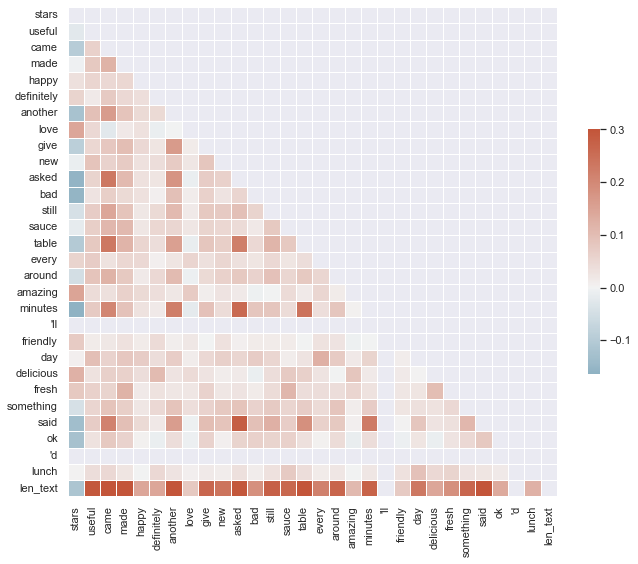

In [10]:
# heatmap

df_corr = df_restaurants.corr()

#taille heatmap
plt.subplots(figsize=(11, 9))

#style
sns.set_theme(style="white")

#quand on a bcp de corrélation, c'est bien de faire une matrice que dans un sens
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=bool))

# palette de couleur
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# heatmap
sns.heatmap(df_corr,                    # tableau de corrélation ci-dessus
            mask=mask,                  # mask = matrice faite dans un seul sens
            cmap=cmap,                  # palette de couleur
            vmax=.3,                    # Valeurs pour ancrer la palette de couleurs      
            center=0,                   # La valeur à laquelle centrer la palette de couleurs lors du traçage de données divergentes
            square=True,                # Si True, définissez l'aspect des axes sur « equal » afin que chaque cellule soit de forme carrée.
            linewidths=.5,              # Largeur des lignes qui diviseront chaque cellule
            cbar_kws={"shrink": .5})    # Arguments de mot-clé pour matplotlib.figure.Figure.colorbar().


plt.show()

Y a-t-il des fortes corrélations dans ce dataset ?
Non je ne vois pas de fortes corrélation, le maximum relevé étant à 0.3 et -0.2

## Target

Crée une colonne "bad_good" qui contiendra :
- "bad" si la note (stars) vaut 1, 2 ou 3 
- "good" si la note (stars) vaut 4 ou 5

Cette nouvelle colonne sera notre "target".

In [11]:
# create a list of our conditions
conditions = [
    (df_restaurants['stars'] <= 3),
    (df_restaurants['stars'] > 3)
    ]

# create a list of the values we want to assign for each condition
values = ['bad', 'good']

# create a new column and use np.select to assign values to it using our lists as arguments
df_restaurants['bad_good'] = np.select(conditions, values)

In [12]:
df_restaurants

,date,stars,text,type,useful,came,made,happy,definitely,another,...,day,delicious,fresh,something,said,ok,'d,lunch,len_text,bad_good
0,2011-01-26,5,My wife took me here on my birthday for breakf...,review,5,1,2,0,0,0,...,0,1,1,0,0,0,0,0,889,good
1,2011-07-27,5,I have no idea why some people give bad review...,review,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,1345,good
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,review,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,76,good
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,419,good
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,review,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,469,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2012-07-28,3,First visit...Had lunch here today - used my G...,review,2,0,0,0,0,1,...,0,0,0,0,0,0,0,1,668,bad
9996,2012-01-18,4,Should be called house of deliciousness!\n\nI ...,review,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,881,good
9997,2010-11-16,4,I recently visited Olive and Ivy for business ...,review,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1425,good
9998,2012-12-02,2,My nephew just moved to Scottsdale recently so...,review,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,880,bad


# Partie 2 : Machine learning (classification supervisée) - scikit-learn - environ 1h

Commence par définir X et y.
- X contiendra toutes les colonnes **numériques SAUF "stars" !** (soit 29 colonnes). *Pour cette partie nous prenons uniquement les colonnes numériques. Nous utiliserons le texte des commentaires dans la partie suivante NLP.*
- y sera la colonne "bad_good"


In [13]:
cols = df_restaurants.select_dtypes(include=np.number).columns.tolist()[1:]

In [14]:

X = df_restaurants[cols]
y = df_restaurants['bad_good']

In [15]:
len(df_without_star) == len(df_restaurants['bad_good'])

NameError: name 'df_without_star' is not defined

## Train test split

Effectue un train test split avec `random_state = 32`

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=32, train_size = 0.75)
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

The length of the initial dataset is : 10000
The length of the train dataset is   : 7500
The length of the test dataset is    : 2500


## Mise à l'échelle

Standardise les données

In [ ]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_train) 


## Régression logistique

Entraine une régression logistique sur ton jeu d'entrainement, puis compare les accuracy scores des jeux d'entrainement et de test. Y a-t-il de l'overfitting ? Les scores sont-ils bons ?

Affiche également une matrice de confusion pour le jeu de test. Combien y a-t-il de commentaires "bad" correctement prédits ?

In [ ]:
#Train a logistic regression
newmodel = LogisticRegression().fit(X_train, y_train)

#score
print(f"The accuracy score for training set: {round(newmodel.score(X_train, y_train),2)}")
print(f"The accuracy score  for test set: {round(newmodel.score(X_test, y_test),2)}")
print(f"we don't have overfitting")

The accuracy score for training set: 0.73
The accuracy score  for test set: 0.74
we don't have overfitting


In [ ]:
#predict
predictions = newmodel.predict(X_test)
predictions


array(['good', 'good', 'good', ..., 'good', 'good', 'good'], dtype=object)

In [ ]:
# Display the Confusion Matrix
cm = confusion_matrix(y_test, predictions)
cm

array([[ 216,  538],
       [ 106, 1640]], dtype=int64)

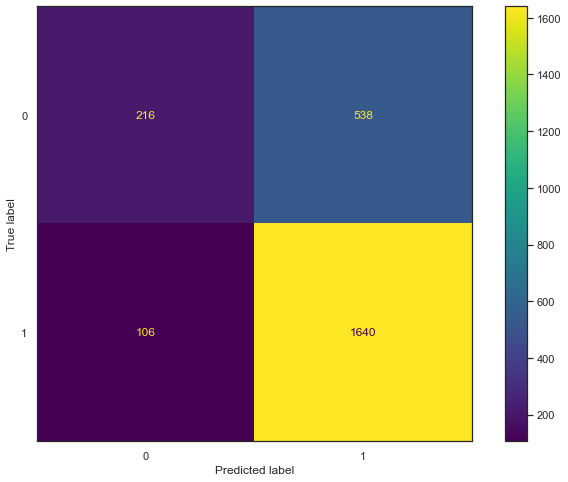

In [ ]:
#Show the Confusion Matrix

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


Il y a 1640 commentaires "bads" correctements prédits et 106 incorrectements prédits

## Decision tree

Entraine un arbre de décision sur ton jeu d'entrainement, puis compare les accuracy scores des jeux d'entrainement et de test. Y a-t-il de l'overfitting ? Les scores sont-ils bons ?

Affiche également une matrice de confusion pour le jeu de test. Combien y a-t-il de commentaires "bad" correctement prédits ?

In [ ]:
# Déclarer le classifieur
restaurants_DTC = DecisionTreeClassifier(random_state=42)

In [ ]:
# entraine le classifieur
restaurants_DTC.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Print the predictions on the test set
predictions_dtc = restaurants_DTC.predict(X_test)
predictions_dtc

array(['good', 'good', 'good', ..., 'bad', 'good', 'good'], dtype=object)

In [ ]:
# Print the accuracy score for the predictions
accuracy_score_train = restaurants_DTC.score(X_train, y_train)
accuracy_score_test = restaurants_DTC.score(X_test, y_test)
print(round(accuracy_score_train,3))
print(round(accuracy_score_test,3))

0.979
0.639


Les scores ne sont pas bons sur le jeu de test, il y a de l'oberfifting sur le jeu d'entraînement

In [ ]:
# Display the Confusion Matrix
cm_dtc = confusion_matrix(y_test, predictions_dtc)
cm_dtc


array([[ 327,  427],
       [ 476, 1270]], dtype=int64)

In [ ]:
font1 = {'family':'Trebuchet MS','color':'darkmagenta','size':25}
font2 = {'family':'Trebuchet MS','color':'darkred','size':20}

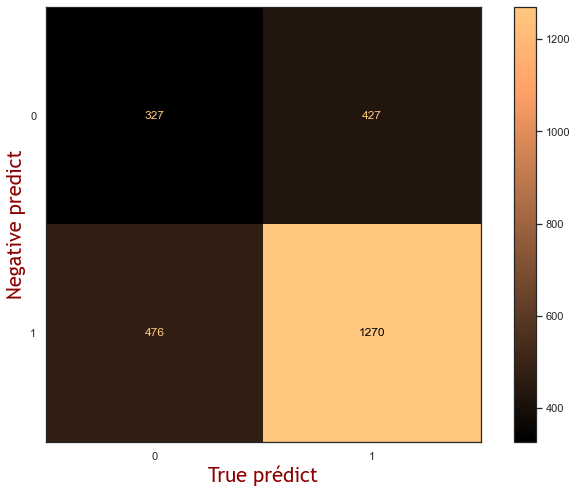

In [ ]:
#Show the Confusion Matrix
disp_dtc = ConfusionMatrixDisplay(confusion_matrix=cm_dtc)
disp_dtc.plot( cmap = "copper", include_values = True)

plt.xlabel("True prédict", fontdict = font2)
plt.ylabel("Negative predict", fontdict = font2)

plt.show()

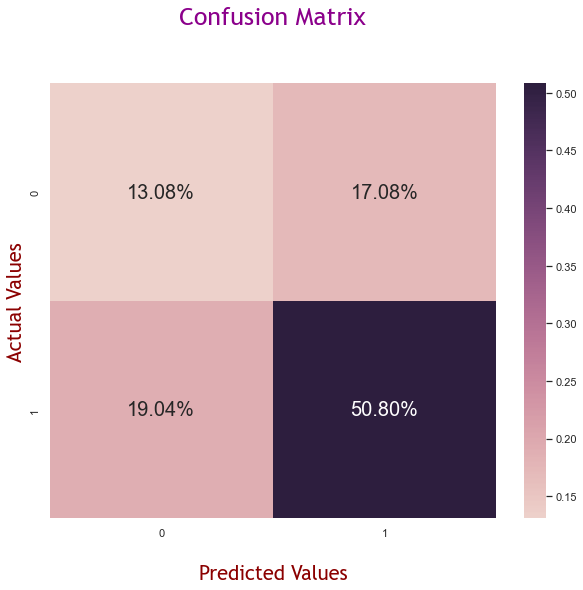

In [ ]:
# graph de Guillaume que j'ai amélioré

ax = plt.figure(figsize=(10,8))
ax = sns.heatmap(cm_dtc/np.sum(cm_dtc), annot=True, cmap=sns.cubehelix_palette(as_cmap=True), fmt='.2%',annot_kws={'size': 20})

ax.set_title('Confusion Matrix\n\n', fontdict = font1)
ax.set_xlabel('\nPredicted Values', fontdict = font2 )
ax.set_ylabel('Actual Values', fontdict = font2)

plt.show()

Il y a 1270 commentaires "bads" correctements prédits et 476 incorrectements prédits

## Decision tree - hyperparamètres

Change les paramètres du modèle pour réduire l'overfitting. Arrives-tu à un meilleur score qu'avec la régression logistique ?

In [ ]:
# Déclarer le classifieur
restaurants_DTC_md = DecisionTreeClassifier(random_state=42, max_depth=2)

# entraine le classifieur
restaurants_DTC_md.fit(X_train, y_train)

# Print the predictions on the test set
predictions_dtc_md = restaurants_DTC_md.predict(X_test)

# Print the accuracy score for the predictions
accuracy_score_train_md = restaurants_DTC_md.score(X_train, y_train)
accuracy_score_test_md = restaurants_DTC_md.score(X_test, y_test)
print(round(accuracy_score_train_md,3))
print(round(accuracy_score_test_md,3))


0.698
0.711


Les scores sont biens meilleurs avec le changement d'hyperparmètres, il n'y a plus d'overfifting sur le jeu d'entraînement

## Question bonus (optionnelle)

Utilise gridsearch pour trouver les meilleurs paramètres

In [ ]:
tree_param = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
param = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=5)
param

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       15, 20, 30, 40, 50, 70, 90, 120, 150]})

# Partie 3 : NLP - Sentiment analysis - environ 1h

Définis une nouvelle variable `X_text` qui ne contiendra que la colonne `text`. y reste identique. 


In [ ]:
X_text = df_restaurants['text']
y=df_restaurants['bad_good']


## Crée une fonction de nettoyage des stopwords et de la ponctuation

Tu peux appeler ta fonction `func_clean`.
Ta fonction doit prendre un `str` en unique paramètre, et retourner un `str`.

Par exemple :

`func_clean("Hello, how are you? Fine, thank you.")`

`>>> 'hello fine thank'`

In [ ]:
stopwordsenglish = set(stopwords.words('english'))


def clean (item) :
    wordsFiltered = []
    for i in range(len(item)):  
        #tokens
        words = word_tokenize(item)
        # retrait ponctuation
        text_without_punct= [word for word in words if word.isalnum()]

        #stopwords
        for w in text_without_punct:
            if w not in stopwordsenglish:
                wordsFiltered.append(w)
        return " ".join(wordsFiltered)

# pour tester ma fonction
data = "Hello, how are you? Fine, thank you."
clean(data)

'Hello Fine thank'

## Applique cette fonction 

Applique cette fonction à `X_text` et enregistre le résultat dans `X_clean`.

In [ ]:
df_restaurants['X_clean'] = X_text.apply(clean)

In [ ]:
df_restaurants.head(2)

,date,stars,text,type,useful,came,made,happy,definitely,another,...,delicious,fresh,something,said,ok,'d,lunch,len_text,bad_good,X_clean
0,2011-01-26,5,My wife took me here on my birthday for breakf...,review,5,1,2,0,0,0,...,1,1,0,0,0,0,0,889,good,My wife took birthday breakfast excellent The ...
1,2011-07-27,5,I have no idea why some people give bad review...,review,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1345,good,I idea people give bad reviews place It goes s...


## Train test split

Découpe tes données `X_clean` et `y` avec un train test split, et le même `random_state = 32`.



In [ ]:

X = df_restaurants['X_clean']
y = df_restaurants['bad_good']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=32, train_size = 0.75)
print("The length of the initial dataset is :", len(X))
print("The length of the train dataset is   :", len(X_train))
print("The length of the test dataset is    :", len(X_test))

The length of the initial dataset is : 10000
The length of the train dataset is   : 7500
The length of the test dataset is    : 2500


## TfidfVectorizer

- Entraine `TfidfVectorizer` sur `X_train` 
- Transforme avec ton vectorizer `X_train` et stocke le résultat dans `X_train_vecto`.
- Transforme avec ton vectorizer `X_test` et stocke le résultat dans `X_test_vecto`.

In [ ]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)

TfidfVectorizer()

In [ ]:
X_train_Vecto = vectorizer.transform(X_train)
X_train_Vecto

<7500x24960 sparse matrix of type '<class 'numpy.float64'>'
	with 440993 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_Vecto  = vectorizer.transform(X_test)
X_test_Vecto

<2500x24960 sparse matrix of type '<class 'numpy.float64'>'
	with 138756 stored elements in Compressed Sparse Row format>

## Régression logistique

Entraine une régression logistique sur `X_train_vecto` et `y_train`.

Compare les accuracy scores des jeux d'entrainement et de test. Y a-t-il de l'overfitting ? Les scores sont-ils meilleurs que dans tes modèles du début du checkpoint ?

Affiche également une matrice de confusion pour le jeu de test. Combien y a-t-il de commentaires "bad" correctement prédits ?

In [ ]:
newmodel = LogisticRegression(max_iter=150).fit(X_train_Vecto, y_train)

#Print the accuracy score 
print(f"The accuracy score for training set: {round(newmodel.score(X_train_Vecto, y_train),3)}")
print(f"The accuracy score  for test set: {round(newmodel.score(X_test_Vecto, y_test),3)}")

The accuracy score for training set: 0.897
The accuracy score  for test set: 0.839


Les scores sont plutôts bons, non je ne relève pas d'overfifting.<br/>
Oui il sont meilleurs qu'au début du checkpoint

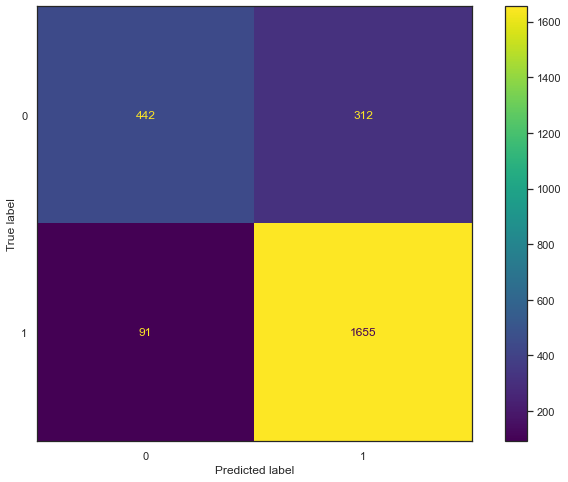

In [ ]:
# Print the predictions on the test set
predictions_vecto = newmodel.predict(X_test_Vecto)
predictions_vecto

# Display the Confusion Matrix
cm_vecto = confusion_matrix(y_test, predictions_vecto)
cm_vecto

#Show the Confusion Matrix
disp_vecto = ConfusionMatrixDisplay(confusion_matrix=cm_vecto)
disp_vecto.plot()
plt.show()

Il y a 1655 commentaires bads correctements prédits et seulement 91 incorrectements prédits. Les résultats sont de plus en plus corrects.

# Partie 4 : WebScraping - BeautifulSoup - environ 1h30

C'est l'hiver, et tu souhaiterais faire une petite étude de marché sur le prix des bonnets.<br/>
Effectue un webscraping des titres et des prix de la page suivante : https://www.primark.com/en/search?text=beanie <br/>
Essaye d'afficher le résultat dans un DataFrame.<br/>
Il doit y avoir environ une vingtaine de bonnets.<br/><br/>

Voici un exemple de résultat attendu (évidemment, les prix et les produits peuvent bouger tous les jours, tu auras donc un résultat différent).






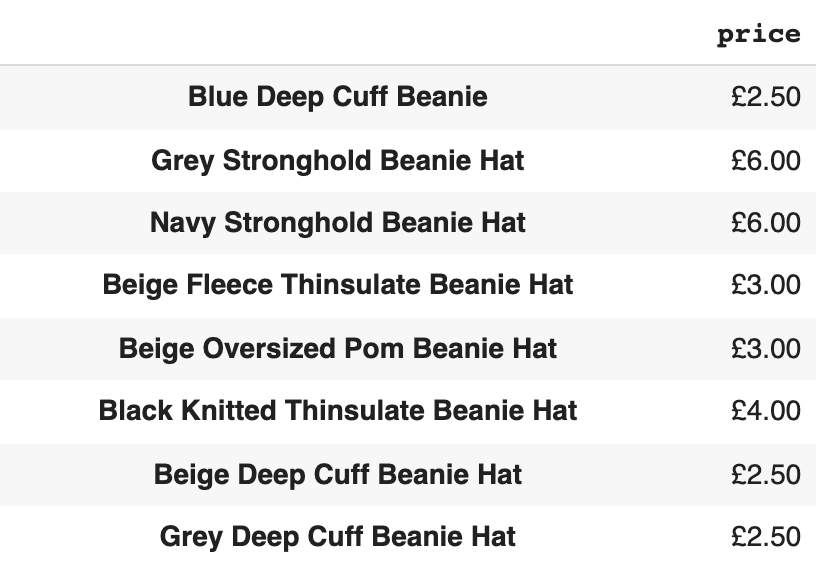

In [ ]:
url = 'https://www.primark.com/en/search?text=beanie'
navigator = 'Chrome/96.0.4664.93'
html = requests.get(url, headers={'User-Agent': navigator})
soup = BeautifulSoup(html.text, 'html.parser')
html

<Response [200]>

In [ ]:
nom_bonnet = soup.find_all('p', {'class':"product-item__name"})
nom_bonnet

[<p class="product-item__name">
                             Navy Stronghold Beanie Hat</p>,
 <p class="product-item__name">
                             Grey Stronghold Beanie Hat</p>,
 <p class="product-item__name">
                             Blue Deep Cuff Beanie</p>,
 <p class="product-item__name">
                             Beige Deep Cuff Beanie Hat</p>,
 <p class="product-item__name">
                             Grey Deep Cuff Beanie Hat</p>,
 <p class="product-item__name">
                             Navy Deep Cuff Beanie Hat</p>,
 <p class="product-item__name">
                             Black Deep Cuff Beanie Hat</p>,
 <p class="product-item__name">
                             Black Deep Cuff Beanie Hat</p>,
 <p class="product-item__name">
                             Black Super Soft Beanie Hat</p>,
 <p class="product-item__name">
                             Beige Fleece Thinsulate Beanie Hat</p>,
 <p class="product-item__name">
                             Beige O

In [ ]:
prix_bonnet = soup.find_all('div', {'class':"product-item__price"})
prix_bonnet

[<div class="product-item__price">
                         £6.00</div>,
 <div class="product-item__price">
                         £6.00</div>,
 <div class="product-item__price">
                         £2.50</div>,
 <div class="product-item__price">
                         £2.50</div>,
 <div class="product-item__price">
                         £2.50</div>,
 <div class="product-item__price">
                         £2.50</div>,
 <div class="product-item__price">
                         £2.50</div>,
 <div class="product-item__price">
                         £2.50</div>,
 <div class="product-item__price">
                         £1.50</div>,
 <div class="product-item__price">
                         £3.00</div>,
 <div class="product-item__price">
                         £3.00</div>,
 <div class="product-item__price">
                         £4.00</div>,
 <div class="product-item__price">
                         £2.50</div>,
 <div class="product-item__price">
                

In [ ]:
# create empty list for select name and price
name_list = []
price_list = []

for i in range(len(nom_bonnet)) :
  name = nom_bonnet[i].get_text()
  name_list.append(name)

for x in range(len(prix_bonnet)):
  price = prix_bonnet[x].get_text()
  price_list.append(price)

# then I create a dict with two lists
beanie__dict = {key: value for key, value in zip(name_list, price_list)}
beanie__dict

{'\n                            Navy Stronghold Beanie Hat': '\n                        £6.00',
 '\n                            Grey Stronghold Beanie Hat': '\n                        £6.00',
 '\n                            Blue Deep Cuff Beanie': '\n                        £2.50',
 '\n                            Beige Deep Cuff Beanie Hat': '\n                        £2.50',
 '\n                            Grey Deep Cuff Beanie Hat': '\n                        £2.50',
 '\n                            Navy Deep Cuff Beanie Hat': '\n                        £2.50',
 '\n                            Black Deep Cuff Beanie Hat': '\n                        £2.50',
 '\n                            Black Super Soft Beanie Hat': '\n                        £1.50',
 '\n                            Beige Fleece Thinsulate Beanie Hat': '\n                        £3.00',
 '\n                            Beige Oversized Pom Beanie Hat': '\n                        £3.00',
 '\n                            Bl

In [ ]:
#create df with beanie_dict et pas Bénédicte :)

df_beanie = pd.Series(beanie__dict)
df_beanie = pd.DataFrame(df_beanie).reset_index()
df_beanie.rename({'index' : 'Nom_du_bonnet', 0 : "Prix"}, axis =1, inplace=True)
df_beanie['Nom_du_bonnet'] = df_beanie['Nom_du_bonnet'].replace({'\n':''}, regex=True)
df_beanie['Prix'] = df_beanie['Prix'].replace({'\n':''}, regex=True)
df_beanie

,Nom_du_bonnet,Prix
0,Navy Stronghold Be...,£6.00
1,Grey Stronghold Be...,£6.00
2,Blue Deep Cuff Beanie,£2.50
3,Beige Deep Cuff Be...,£2.50
4,Grey Deep Cuff Bea...,£2.50
5,Navy Deep Cuff Bea...,£2.50
6,Black Deep Cuff Be...,£2.50
7,Black Super Soft B...,£1.50
8,Beige Fleece Thins...,£3.00
9,Beige Oversized Po...,£3.00




<h4><span style="color:Yellow"> J'ai terminé ce Checkpoint à 13h29 ! </span>.